# Exploratory Data Analysis (EDA)

## Import Libraries

In [48]:
# %load_ext fireducks.pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [66]:
df_small = pd.read_csv('../data/customers-100000.csv')
# print(df_small.head())
df_small.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,2021-11-11,https://www.mccarthy.info/
1,2,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,2021-05-14,http://www.reynolds.com/
2,3,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,2021-03-17,https://neal.com/
3,4,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,2020-09-23,https://www.powell-bryan.com/
4,5,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,2020-09-18,https://www.carrillo.com/


In [67]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Index              100000 non-null  int64 
 1   Customer Id        100000 non-null  object
 2   First Name         100000 non-null  object
 3   Last Name          100000 non-null  object
 4   Company            100000 non-null  object
 5   City               100000 non-null  object
 6   Country            100000 non-null  object
 7   Phone 1            100000 non-null  object
 8   Phone 2            100000 non-null  object
 9   Email              100000 non-null  object
 10  Subscription Date  100000 non-null  object
 11  Website            100000 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.2+ MB


In [68]:
df_small.describe(include='all')

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
count,100000.000000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,NaN,100000,690,1000,71994,49154,243,100000,100000,99995,880,50471
top,NaN,ffeCAb7AbcB0f07,Joan,Campbell,Wilkerson Ltd,Lake Frederick,Congo,274.188.8773x41185,001-215-760-4642x969,julia03@briggs.com,2020-12-11,https://guzman.com/
freq,NaN,1,183,139,17,16,835,1,1,2,155,22
mean,50000.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,28867.657797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25000.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50000.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75000.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Memory Optimization

In [69]:
def optimize_mem_usage(df_small):
    # Reference: https://medium.com/@gautamrajotya/how-to-reduce-memory-usage-in-python-pandas-158427a99001

    # Convert to Pandas Datetime
    df_small['Subscription Date'] = pd.to_datetime(df_small['Subscription Date'])

    # Drop non-usefull columns
    if sum([col in df_small.columns for col in ["Index", "Customer Id"]]) > 0:
        df_small = df_small.drop(columns=["Index", "Customer Id"])

    # Changing categorical columns
    for col in ['Country', 'First Name', 'Last Name']:
        df_small[col] = df_small[col].astype('category')

    return df_small

In [70]:
df_small = optimize_mem_usage(df_small)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   First Name         100000 non-null  category      
 1   Last Name          100000 non-null  category      
 2   Company            100000 non-null  object        
 3   City               100000 non-null  object        
 4   Country            100000 non-null  category      
 5   Phone 1            100000 non-null  object        
 6   Phone 2            100000 non-null  object        
 7   Email              100000 non-null  object        
 8   Subscription Date  100000 non-null  datetime64[ns]
 9   Website            100000 non-null  object        
dtypes: category(3), datetime64[ns](1), object(6)
memory usage: 6.0+ MB


## Attributes of interest:
- Company
- City
- Country
- Subscription Date

## Univariate Analysis

### Country

Country
Congo               835
Korea               820
Saudi Arabia        463
Pitcairn Islands    456
Saint Martin        453
Name: count, dtype: int64


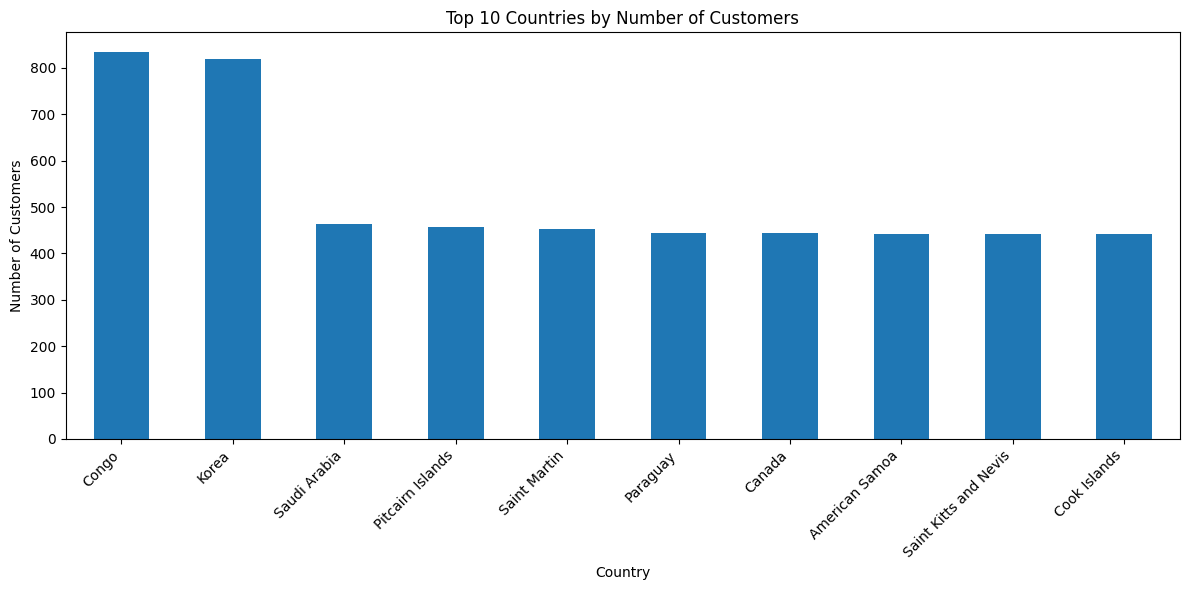

In [ ]:
# Which country has the highest number of customers?
country_counts = df_small['Country'].value_counts()
print(country_counts.head())

# Visualize the top countries
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

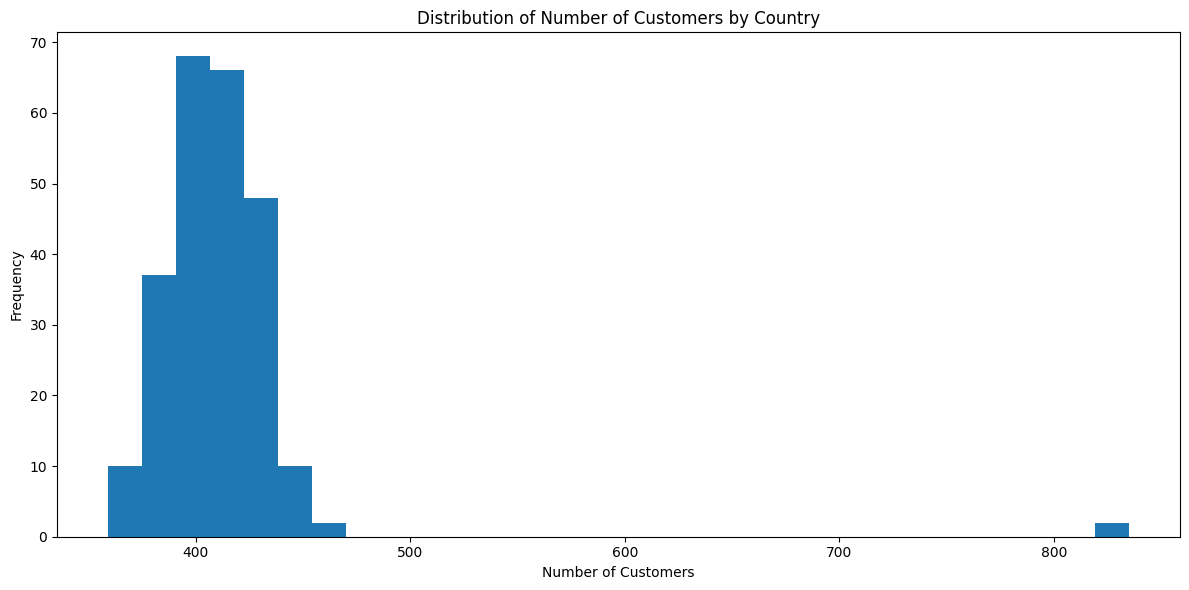

In [6]:
# Show distribution of number of customers by country
plt.figure(figsize=(12, 6))
country_counts.plot(kind='hist', bins=30)
plt.title('Distribution of Number of Customers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Company

Company
Wilkerson Ltd      17
Campbell Ltd       17
Acosta Ltd         16
Booker and Sons    16
Mckenzie PLC       15
Name: count, dtype: int64


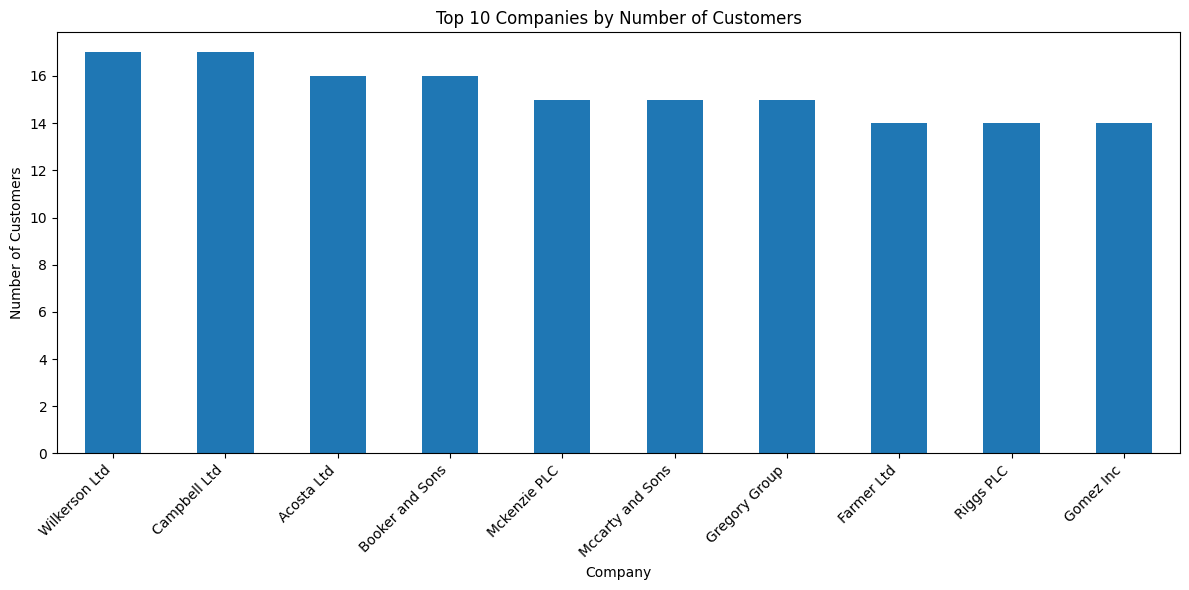

In [ ]:
# Which countries have the highest number of customers?
company_counts = df_small['Company'].value_counts()
print(company_counts.head())

# Visualize the top companies
plt.figure(figsize=(12, 6))
company_counts.head(10).plot(kind='bar')
plt.title('Top 10 Companies by Number of Customers')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

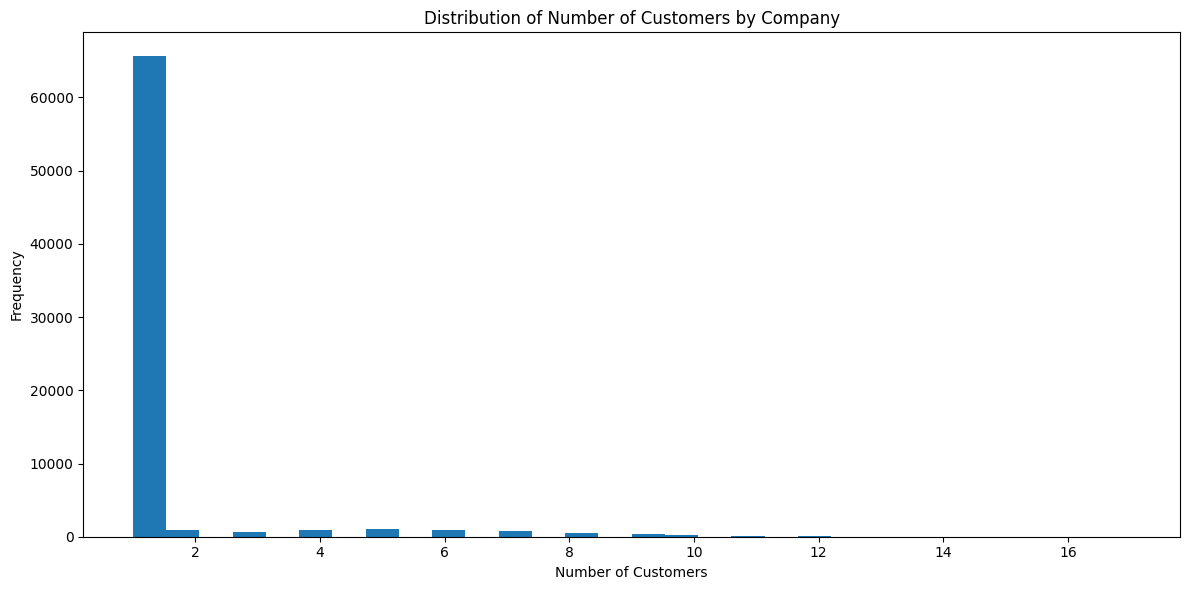

In [8]:
# Create a Distribution plot for Number of Customer by Company
plt.figure(figsize=(12, 6))
company_counts.plot(kind='hist', bins=30)
plt.title('Distribution of Number of Customers by Company')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Subscription Date

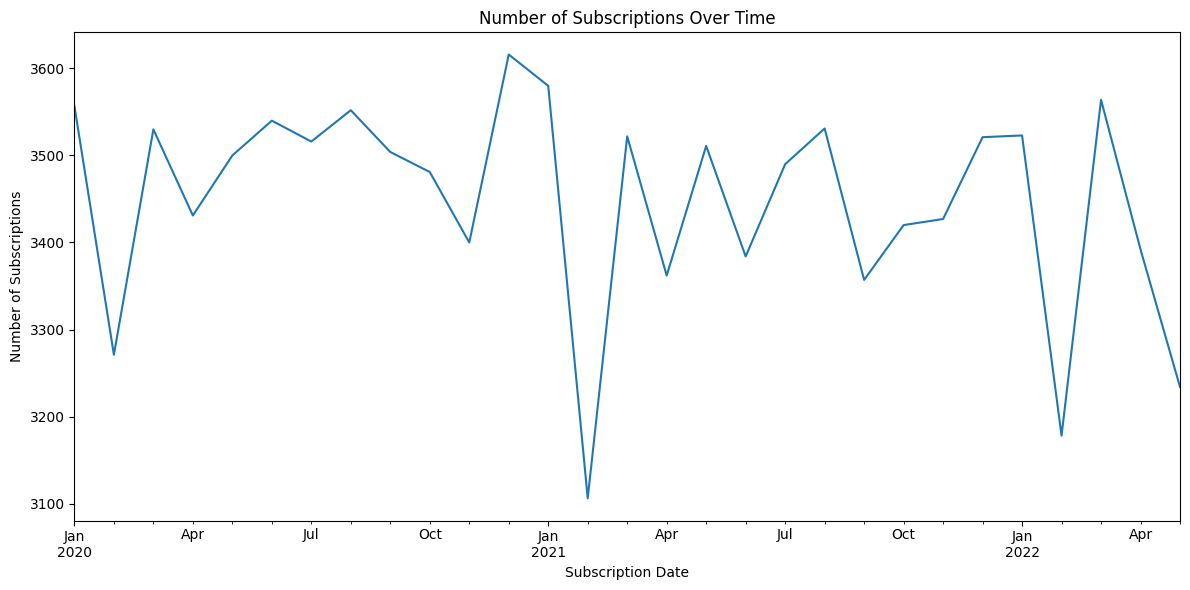

In [ ]:
# Show a line chart of number of subscriptions over time
df_small['Subscription Date'] = pd.to_datetime(df_small['Subscription Date'])
subscriptions_over_time = df_small.groupby(df_small['Subscription Date'].dt.to_period('M')).size()
subscriptions_over_time.index = subscriptions_over_time.index.to_timestamp()
plt.figure(figsize=(12, 6))
subscriptions_over_time.plot(kind='line')
plt.title('Number of Subscriptions Over Time')
plt.xlabel('Subscription Date')
plt.ylabel('Number of Subscriptions')
plt.tight_layout()
plt.show()

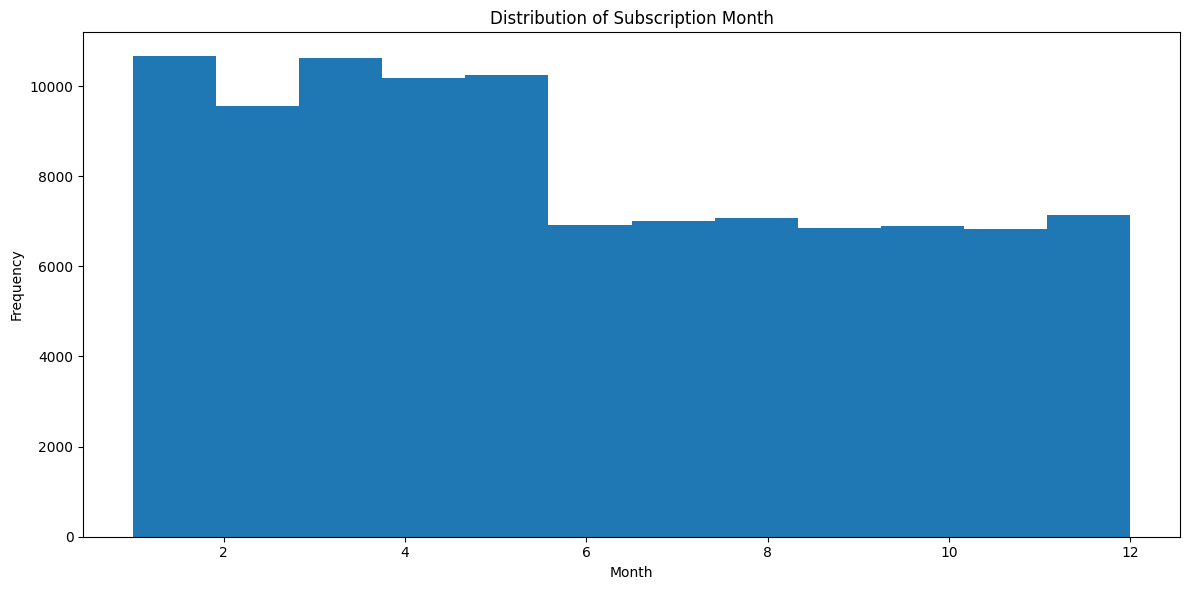

In [ ]:
# Show a distribution of subscription dates monthly
plt.figure(figsize=(12, 6))
df_small['Subscription Date'].dt.month.plot(kind='hist', bins=12)
plt.title('Distribution of Subscription Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Bivariate Analysis
## Attributes of interest:
# - Company
# - City
# - Country
# - Subscription Date

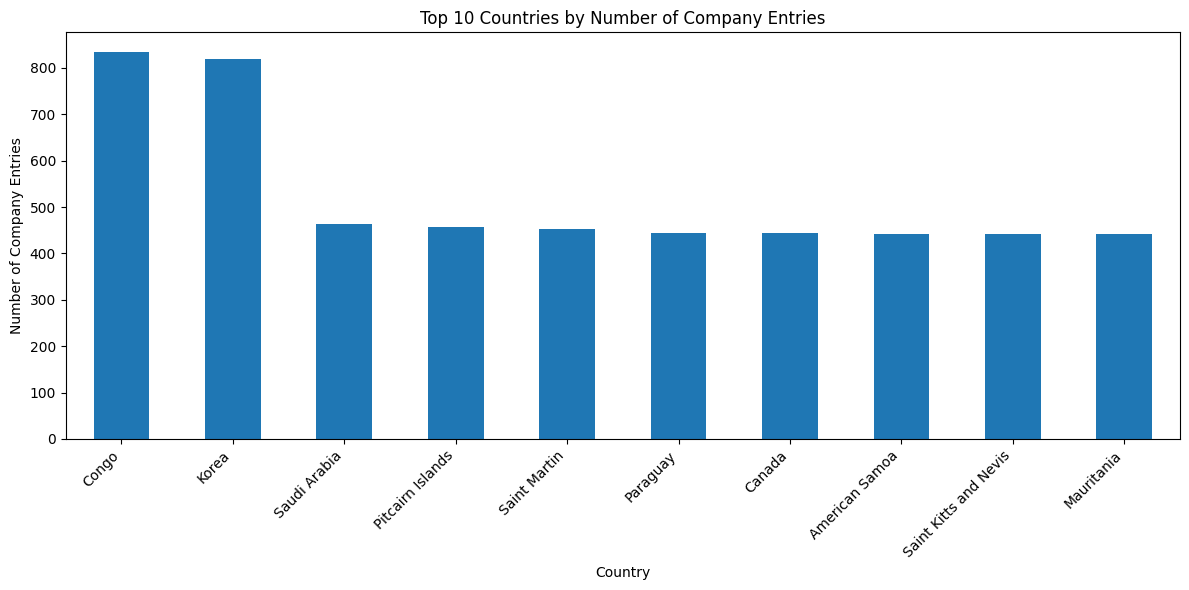

In [ ]:
# Visualize the number of companies per country
country_company_counts = df_small.groupby('Country')['Company'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_company_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Company Entries')
plt.xlabel('Country')
plt.ylabel('Number of Company Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Comparison with Large Data

In [71]:
df_large = pd.read_csv('../data/customers-2000000.csv') # chunksize=10_000
# Pandas: 5.3s
# Pandas + chunksize: 0.1s

In [72]:
df_large.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,4962fdbE6Bfee6D,Pam,Sparks,Patel-Deleon,Blakemouth,British Indian Ocean Territory (Chagos Archipe...,267-243-9490x035,480-078-0535x889,nicolas00@faulkner-kramer.com,2020-11-29,https://nelson.com/
1,2,9b12Ae76fdBc9bE,Gina,Rocha,"Acosta, Paul and Barber",East Lynnchester,Costa Rica,027.142.0940,+1-752-593-4777x07171,yfarley@morgan.com,2021-01-03,https://pineda-rogers.biz/
2,3,39edFd2F60C85BC,Kristie,Greer,Ochoa PLC,West Pamela,Ecuador,+1-049-168-7497x5053,+1-311-216-7855,jennyhayden@petty.org,2021-06-20,https://mckinney.com/
3,4,Fa42AE6a9aD39cE,Arthur,Fields,Moyer-Wang,East Belinda,Afghanistan,001-653-754-7486x65787,521-630-3858x953,igrimes@ruiz-todd.org,2020-02-13,https://dominguez.biz/
4,5,F5702Edae925F1D,Michelle,Blevins,Shah and Sons,West Jared,Marshall Islands,8735278329,(633)283-6034x500,diamondcarter@jordan.com,2020-10-20,http://murillo-ryan.com/


In [73]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Index              int64 
 1   Customer Id        object
 2   First Name         object
 3   Last Name          object
 4   Company            object
 5   City               object
 6   Country            object
 7   Phone 1            object
 8   Phone 2            object
 9   Email              object
 10  Subscription Date  object
 11  Website            object
dtypes: int64(1), object(11)
memory usage: 183.1+ MB


In [74]:
df_large = optimize_mem_usage(df_large)
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   First Name         category      
 1   Last Name          category      
 2   Company            object        
 3   City               object        
 4   Country            category      
 5   Phone 1            object        
 6   Phone 2            object        
 7   Email              object        
 8   Subscription Date  datetime64[ns]
 9   Website            object        
dtypes: category(3), datetime64[ns](1), object(6)
memory usage: 118.3+ MB


In [75]:
# # Before:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 2000000 entries, 0 to 1999999
# Data columns (total 10 columns):
#  #   Column             Dtype 
# ---  ------             ----- 
#  0   First Name         object
#  1   Last Name          object
#  2   Company            object
#  3   City               object
#  4   Country            object
#  5   Phone 1            object
#  6   Phone 2            object
#  7   Email              object
#  8   Subscription Date  object
#  9   Website            object
# dtypes: object(10)
# memory usage: 152.6+ MB

# # After
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 2000000 entries, 0 to 1999999
# Data columns (total 10 columns):
#  #   Column             Dtype         
# ---  ------             -----         
#  0   First Name         category      
#  1   Last Name          category      
#  2   Company            object        
#  3   City               object        
#  4   Country            category      
#  5   Phone 1            object        
#  6   Phone 2            object        
#  7   Email              object        
#  8   Subscription Date  datetime64[ns]
#  9   Website            object        
# dtypes: category(3), datetime64[ns](1), object(6)
# memory usage: 118.3+ MB